In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

In [2]:
#dataset
#selected stocks: information technology industry
#kivettem 3 reszvenyt, mert kesobb lettek bevezetve mint 2015 januar 1, igy problemat okoztak a rendszerben:
#HPE, PYPL, CSRA
symbol_list = ['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADS','ADSK', 'AKAM', 'AMAT', 'ATVI', 'AVGO', 'CA','CRM',
               'CTSH', 'CTXS' ,'CSCO', 'EA','EBAY', 'EMC', 'EQIX', 'FB', 'FFIV', 'FIS', 'FISV', 'FSLR', 
               'GOOG', 'GOOG_L', 'GPN', 'HPQ', 'HRS', 'IBM', 'INTC', 'INTU', 'JNPR', 'KLAC', 'LLTC', 
               'LRCX', 'MA', 'MCHP', 'MSFT', 'MSI', 'MU', 'NFLX', 'NTAP', 'NVDA', 'ORCL', 'PAYX', 'QCOM', 
               'QRVO', 'RHT', 'SNDK', 'STX', 'SWKS', 'SYMC','TDC','TEL', 'TSS', 'TXN', 'V', 'VRSN', 'WDC', 'WU', 
               'XLNX', 'XRX', 'YHOO']

securities_panel = get_pricing(symbol_list, fields=['close_price']
                               , start_date='2015-01-01', end_date='2016-01-01', handle_missing='raise')
securities_panel.minor_axis = map(lambda x: x.symbol, securities_panel.minor_axis)

In [3]:
#Ures cellak megletenek ellenorzese
securities_panel.isnull().values.any()

False

In [4]:
#augmented dickey fuller teszt elvegzese a cointegration kiszamolasara
def cointegration(securities_panel):
    n = len(securities_panel.minor_axis)
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = securities_panel.keys
    pairs=[]
    for i in range(n):
        for j in range(i+1, n):
            S1 = securities_panel.minor_xs(securities_panel.minor_axis[i])
            S2 = securities_panel.minor_xs(securities_panel.minor_axis[j])
            res = sm.OLS(S1, S2).fit()
            res2=ts.adfuller(res.resid)
            score = res2[0]
            pvalue = res2[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((securities_panel.minor_axis[i], securities_panel.minor_axis[j], pvalue))
    return score_matrix, pvalue_matrix, pairs

In [76]:
n=2
for i in range(n):
        for j in range(i+1, n):
            S1 = securities_panel.minor_xs(securities_panel.minor_axis[i])
            S2 = securities_panel.minor_xs(securities_panel.minor_axis[j])
            res = sm.OLS(S1, S2).fit()
            res2=ts.adfuller(res.resid)
            print "S1:"
            print S1
            print "S2:"
            print S2
            print "OLS result:"
            print res.summary()
            print "ADF result:"
            print res2

S1:
                           close_price
2015-01-02 00:00:00+00:00     109.3000
2015-01-05 00:00:00+00:00     106.2500
2015-01-06 00:00:00+00:00     106.2300
2015-01-07 00:00:00+00:00     107.7500
2015-01-08 00:00:00+00:00     111.8700
2015-01-09 00:00:00+00:00     112.0000
2015-01-12 00:00:00+00:00     109.2600
2015-01-13 00:00:00+00:00     110.2250
2015-01-14 00:00:00+00:00     109.7900
2015-01-15 00:00:00+00:00     106.8300
2015-01-16 00:00:00+00:00     105.9800
2015-01-20 00:00:00+00:00     108.7100
2015-01-21 00:00:00+00:00     109.5500
2015-01-22 00:00:00+00:00     112.3900
2015-01-23 00:00:00+00:00     112.9900
2015-01-26 00:00:00+00:00     113.0900
2015-01-27 00:00:00+00:00     109.1500
2015-01-28 00:00:00+00:00     115.3200
2015-01-29 00:00:00+00:00     118.9300
2015-01-30 00:00:00+00:00     117.1600
2015-02-02 00:00:00+00:00     118.6200
2015-02-03 00:00:00+00:00     118.6000
2015-02-04 00:00:00+00:00     119.5500
2015-02-05 00:00:00+00:00     119.9400
2015-02-06 00:00:00+0

[(u'AAPL', u'ADI', 0.033509383956296018), (u'AAPL', u'EMC', 0.015945283400155233), (u'AAPL', u'IBM', 0.023800092509835852), (u'AAPL', u'NTAP', 0.019599999785542041), (u'AAPL', u'ORCL', 0.0058474010893960586), (u'AAPL', u'YHOO', 0.011742894083300016), (u'ACN', u'CRM', 0.038856278827746532), (u'ACN', u'CTXS', 0.0050519835389230341), (u'ACN', u'FISV', 0.024840389819541207), (u'ADBE', u'CRM', 0.021732336262609998), (u'ADBE', u'CTXS', 0.018652355314923992), (u'ADBE', u'FISV', 0.027534195871394981), (u'ADBE', u'MSFT', 0.041754343690748805), (u'ADBE', u'SNDK', 0.033793147435595181), (u'ADBE', u'V', 0.0031726822644121914), (u'ADI', u'INTU', 0.019652747602413031), (u'ADI', u'WU', 0.0054600647500788321), (u'ADP', u'EMC', 0.0031241265493769385), (u'ADP', u'MCHP', 0.031280605810980827), (u'ADP', u'SNDK', 0.01374053775220827), (u'ADS', u'EMC', 0.012016631526889494), (u'ADS', u'SNDK', 0.03999151969968831), (u'ADS', u'WU', 0.022372033103040388), (u'ADSK', u'KLAC', 0.016300203908594848), (u'ADSK', u'S

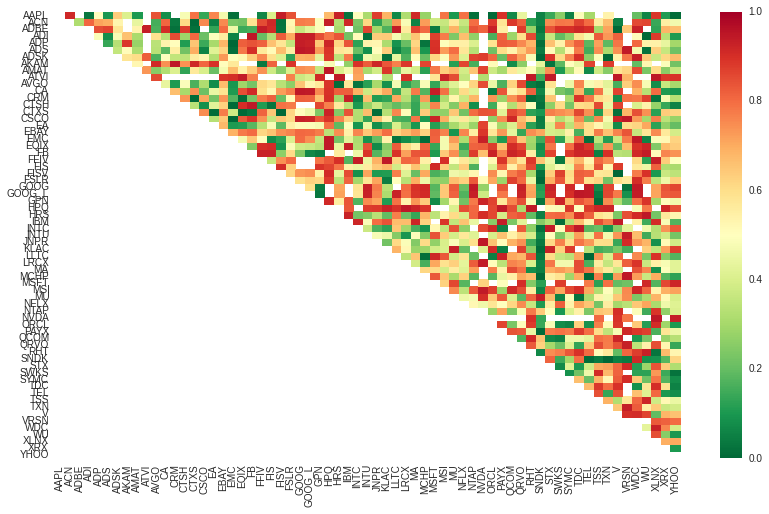

In [5]:
#lehetseges parok kiirasa, a kapcsolatok abrazolasa heapmap-en
scores, pvalues, pairs = cointegration(securities_panel)
import seaborn as sns
sns.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r', mask = (pvalues >= 0.95))
print pairs

In [6]:
#jobb lathatosag erdekeben dataframebe rendezve
pairs_df=pd.DataFrame(pairs)
pairs_df.columns = ['Stock 1', 'Stock 2', 'P Value']
pairs_df

,Stock 1,Stock 2,P Value
0,AAPL,ADI,0.033509
1,AAPL,EMC,0.015945
2,AAPL,IBM,0.023800
3,AAPL,NTAP,0.019600
4,AAPL,ORCL,0.005847
5,AAPL,YHOO,0.011743
6,ACN,CRM,0.038856
7,ACN,CTXS,0.005052
8,ACN,FISV,0.024840
9,ADBE,CRM,0.021732


In [7]:
#pvalue szerinti sorbarendezes
pairs_df.sort(columns="P Value", ascending=True)

,Stock 1,Stock 2,P Value
44,CTXS,FISV,0.000077
47,CSCO,EMC,0.000143
73,LLTC,TEL,0.000651
76,MCHP,TEL,0.001566
24,ADSK,SNDK,0.001686
82,SNDK,TXN,0.002604
57,FISV,V,0.002762
59,FSLR,SNDK,0.002898
17,ADP,EMC,0.003124
14,ADBE,V,0.003173


In [8]:
from statsmodels.tsa.stattools import coint
import statsmodels as sm

Correlation: 0.938315396406
Cointegration test p-value: 0.000422164588027


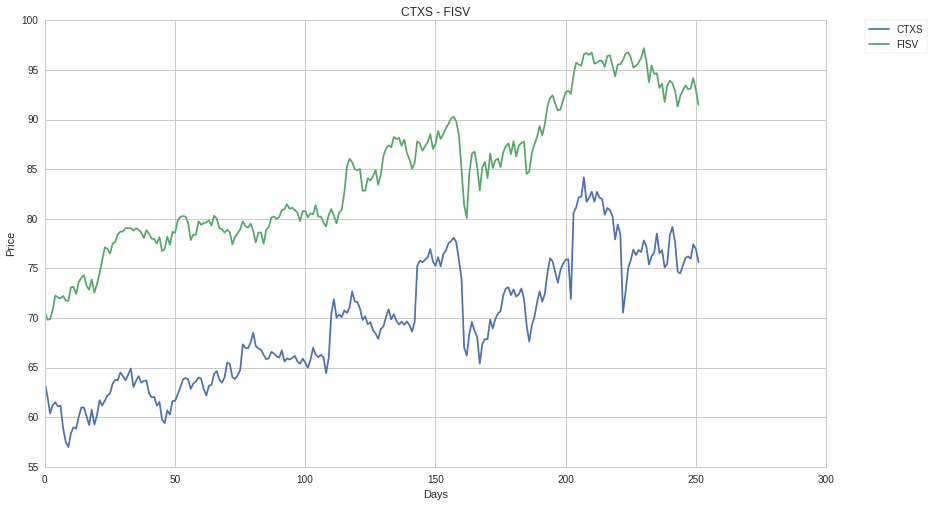

In [9]:
ctxs_pricing=get_pricing('CTXS', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None, 
                        frequency='daily', fields='close_price', handle_missing='raise')
ctxs_pricing_df=pd.DataFrame(ctxs_pricing)

fisv_pricing=get_pricing('FISV', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None,
                         frequency='daily', fields='close_price', handle_missing='raise')
fisv_pricing_df=pd.DataFrame(fisv_pricing)
plt.plot(ctxs_pricing, label="CTXS")
plt.plot(fisv_pricing, label="FISV" )

plt.title('CTXS - FISV')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Price')


print 'Correlation: ' + str(ctxs_pricing.corr(fisv_pricing))
score, pvalue, _  = coint(ctxs_pricing,fisv_pricing)
print 'Cointegration test p-value: ' + str(pvalue)

Correlation: 0.674688532466
Cointegration test p-value: 0.00662883396744


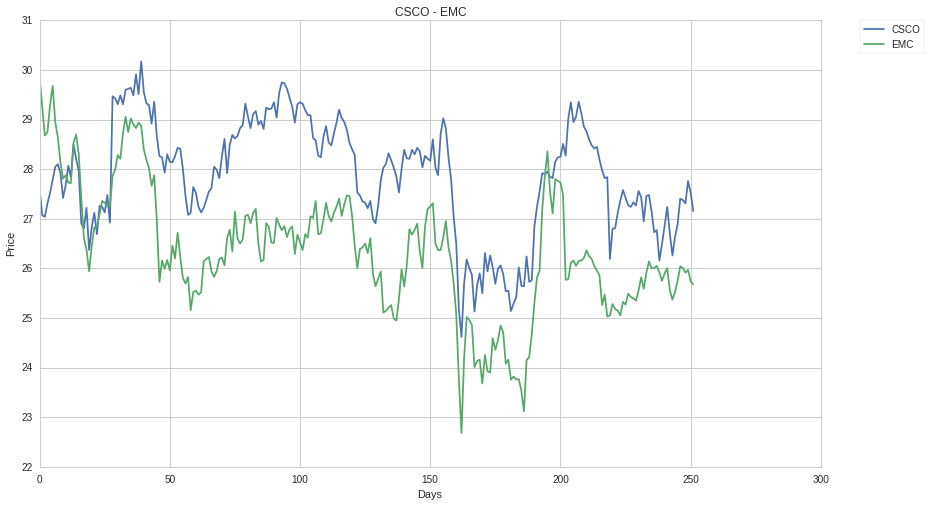

In [10]:
csco_pricing=get_pricing('CSCO', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None, 
                        frequency='daily', fields='close_price', handle_missing='raise')
csco_pricing_df=pd.DataFrame(csco_pricing)

emc_pricing=get_pricing('EMC', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None,
                         frequency='daily', fields='close_price', handle_missing='raise')
emc_pricing_df=pd.DataFrame(emc_pricing)
plt.plot(csco_pricing, label="CSCO")
plt.plot(emc_pricing, label="EMC" )

plt.title('CSCO - EMC')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Price')


print 'Correlation: ' + str(csco_pricing.corr(emc_pricing))
score, pvalue, _  = coint(csco_pricing,emc_pricing)
print 'Cointegration test p-value: ' + str(pvalue)

Correlation: 0.902449853059
Cointegration test p-value: 0.00279265649742


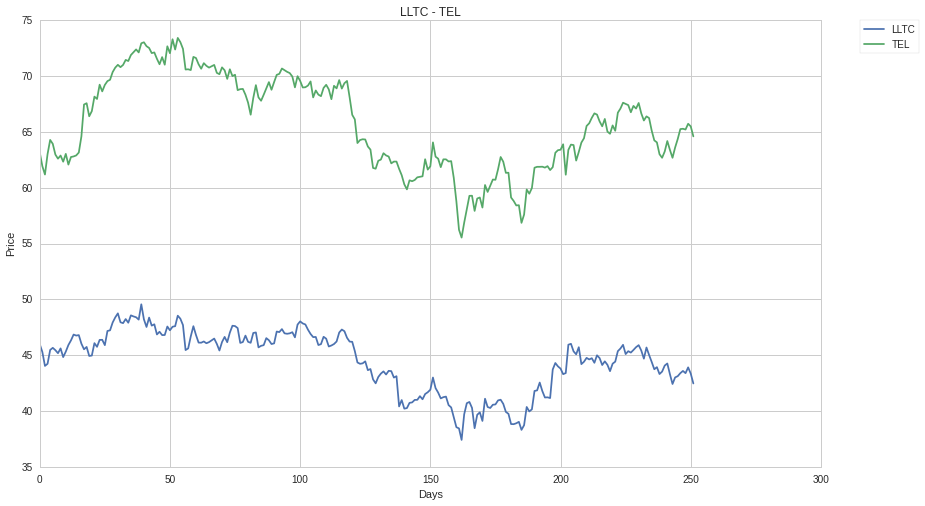

In [11]:
lltc_pricing=get_pricing('LLTC', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None, 
                        frequency='daily', fields='close_price', handle_missing='raise')
lltc_pricing_df=pd.DataFrame(lltc_pricing)

tel_pricing=get_pricing('TEL', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None,
                         frequency='daily', fields='close_price', handle_missing='raise')
tel_pricing_df=pd.DataFrame(tel_pricing)
plt.plot(lltc_pricing, label="LLTC")
plt.plot(tel_pricing, label="TEL" )

plt.title('LLTC - TEL')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Price')


print 'Correlation: ' + str(lltc_pricing.corr(tel_pricing))
score, pvalue, _  = coint(lltc_pricing,tel_pricing)
print 'Cointegration test p-value: ' + str(pvalue)

Correlation: 0.904543595752
Cointegration test p-value: 0.00883047205961


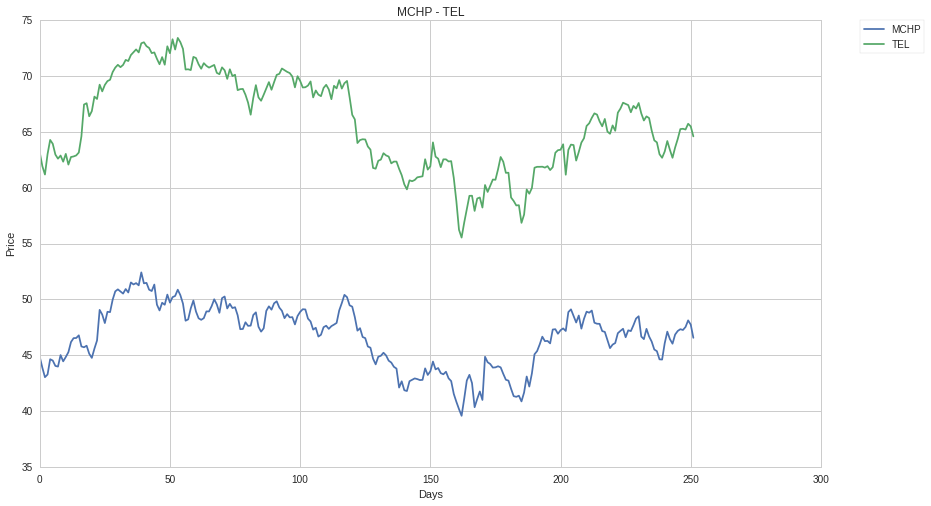

In [12]:
mchp_pricing=get_pricing('MCHP', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None, 
                        frequency='daily', fields='close_price', handle_missing='raise')
mchp_pricing_df=pd.DataFrame(mchp_pricing)

tel_pricing=get_pricing('TEL', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None,
                         frequency='daily', fields='close_price', handle_missing='raise')
tel_pricing_df=pd.DataFrame(tel_pricing)
plt.plot(mchp_pricing, label="MCHP")
plt.plot(tel_pricing, label="TEL" )

plt.title('MCHP - TEL')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Price')


print 'Correlation: ' + str(mchp_pricing.corr(tel_pricing))
score, pvalue, _  = coint(mchp_pricing,tel_pricing)
print 'Cointegration test p-value: ' + str(pvalue)

Correlation: 0.718843530653
Cointegration test p-value: 0.222689578792


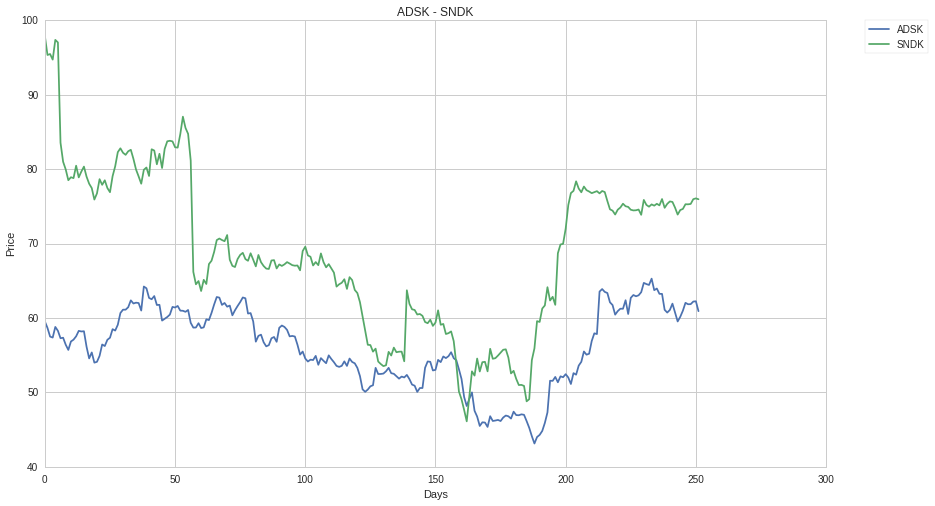

In [13]:
adsk_pricing=get_pricing('ADSK', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None, 
                        frequency='daily', fields='close_price', handle_missing='raise')
adsk_pricing_df=pd.DataFrame(adsk_pricing)

sndk_pricing=get_pricing('SNDK', start_date='2015-01-01', end_date='2016-01-01', symbol_reference_date=None,
                         frequency='daily', fields='close_price', handle_missing='raise')
sndk_pricing_df=pd.DataFrame(sndk_pricing)
plt.plot(adsk_pricing, label="ADSK")
plt.plot(sndk_pricing, label="SNDK" )

plt.title('ADSK - SNDK')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Price')


print 'Correlation: ' + str(adsk_pricing.corr(sndk_pricing))
score, pvalue, _  = coint(adsk_pricing,sndk_pricing)
print 'Cointegration test p-value: ' + str(pvalue)

In [18]:
#daily return kiszamolasa
returns_panel = securities_panel.pct_change()

In [54]:
#sharpe ratio kiszamolasa
def sharpe_ratio(returns_panel):
    n = len(returns_panel.minor_axis)
    sharpe_ratio_matrix = np.zeros((n, n))
    keys = returns_panel.keys
    for i in range(n):
        for j in range(i+1,n):
            R1 = returns_panel.minor_xs(returns_panel.minor_axis[i])
            R2 = returns_panel.minor_xs(returns_panel.minor_axis[j])
            avg= (R1+R2)/len((R1+R2))
            std= np.std(np.concatenate(R1, R2),axis=0)
           
            #std=sqrt(mean(abs(x - x.mean())**2))
            sharpe_ratio= (np.sqrt(n))*avg/std

            sharpe_ratio_matrix[i, j] = sharpe_ratio
            
            
    return sharpe_ratio

In [55]:
sharpe_ratio = sharpe_ratio(returns_panel)
print sharpe_ratio

close_price    0.213347
dtype: float64


In [43]:
#normally there are 252 trading days during the year
f_portf_volatility = np.std(returns_panel)
f_portf_avgret = np.mean(returns_panel)
f_portf_sharpe = (f_portf_avgret / f_portf_volatility) * np.sqrt(252)

In [11]:
type(f_portf_sharpe)

NameError: name 'f_portf_sharpe' is not defined

In [47]:
meanPrice = np.mean(prices[stock1] - beta*prices[stock2])
stdPrice= np.std(prices[stock1] - beta*prices[stock2])

NameError: name 'prices' is not defined

In [32]:
securities_panel.values

array([[[ 109.3   ,   88.85  ,   72.34  , ...,   43.59  ,   13.76  ,
           50.16  ],
        [ 106.25  ,   87.38  ,   71.99  , ...,   42.8   ,   13.47  ,
           49.14  ],
        [ 106.23  ,   86.69  ,   70.52  , ...,   42.17  ,   13.27  ,   49.2   ],
        ..., 
        [ 108.74  ,  105.31  ,   95.32  , ...,   48.18  ,   10.71  ,
           34.04  ],
        [ 107.32  ,  105.88  ,   95.27  , ...,   47.84  ,   10.72  ,
           33.37  ],
        [ 105.2299,  104.52  ,   93.91  , ...,   46.97  ,   10.6201,
           33.25  ]]])

In [33]:
securities_panel.axes

[Index([u'close_price'], dtype='object'),
 DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
                '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
                '2015-01-14', '2015-01-15', 
                ...
                '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
                '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
                '2015-12-30', '2015-12-31'],
               dtype='datetime64[ns]', length=252, freq=None, tz='UTC'),
 Index([  u'AAPL',    u'ACN',   u'ADBE',    u'ADI',    u'ADP',    u'ADS',
          u'ADSK',   u'AKAM',   u'AMAT',   u'ATVI',   u'AVGO',     u'CA',
           u'CRM',   u'CTSH',   u'CTXS',   u'CSCO',     u'EA',   u'EBAY',
           u'EMC',   u'EQIX',     u'FB',   u'FFIV',    u'FIS',   u'FISV',
          u'FSLR',   u'GOOG', u'GOOG_L',    u'GPN',    u'HPQ',    u'HRS',
           u'IBM',   u'INTC',   u'INTU',   u'JNPR',   u'KLAC',   u'LLTC',
          u'LRCX',     u'MA',   u'MCHP',   

In [43]:
securities_panel.to_frame()

close_price
major                     minor              
2015-01-02 00:00:00+00:00 AAPL       109.3000
                          ACN         88.8500
                          ADBE        72.3400
                          ADI         55.5300
                          ADP         83.2800
                          ADS        285.2300
                          ADSK        59.5300
                          AKAM        63.2500
                          AMAT        24.9400
                          ATVI        20.1250
                          AVGO       100.0800
                          CA          30.6950
                          CRM         59.2400
                          CTSH        52.6600
                          CTXS        63.4700
                          CSCO        27.6000
                          EA          46.8600
                          EBAY        56.2000
                          EMC         29.8400
                          EQIX       226.5600
                          FB          78.4500
                          FFIV       130.3200
                          FIS         62.4100
                          FISV        70.6100
                          FSLR        44.5400
                          GOOG       523.3720
                          GOOG_L     529.5500
                          GPN         40.3200
                          HPQ         40.2500
                          HRS         71.6300
...                                       ...
2015-12-31 00:00:00+00:00 LLTC        42.4700
                          LRCX        79.4100
                          MA          97.4300
                          MCHP        46.5600
                          MSFT        55.4500
                          MSI         68.4500
                          MU          14.1700
                          NFLX       114.3900
                          NTAP        26.5300
                          NVDA        32.9600
                          ORCL        36.5200
                          PAYX        52.8700
                          QCOM        49.9850
                          QRVO        50.9040
                          RHT         82.8000
                          SNDK        75.9600
                          STX         36.6500
                          SWKS        76.8000
                          SYMC        21.0000
                          TDC         26.4100
                          TEL         64.6100
                          TSS         49.8000
                          TXN         54.8100
                          V           77.5500
                          VRSN        87.3500
                          WDC         60.0500
                          WU          17.9200
                          XLNX        46.9700
                          XRX         10.6201
                          YHOO        33.2500

[16380 rows x 1 columns]